In [1]:
# import necessary module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(42)

In [2]:
# read in file and get descriptive statistics
df_users = pd.read_csv('takehome_users.csv', encoding='latin')
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
df_users.describe(include='all')

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,12000,12000,12000,12000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
unique,NaN,11996,11355,11980,5,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-09-14 21:35:03,Cavalcanti Victor,UlrikeGerste@gmail.com,ORG_INVITE,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,5,2,4254,NaN,NaN,NaN,NaN,NaN
mean,6000.50000,NaN,NaN,NaN,NaN,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,NaN,NaN,NaN,NaN,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,NaN,NaN,NaN,NaN,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,NaN,NaN,NaN,NaN,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,NaN,NaN,NaN,NaN,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,NaN,NaN,NaN,NaN,1.398443e+09,0.000000,0.000000,238.250000,8817.000000


Looking at the mean, 25% of users are opted into the mailing list and 15% are on the marketing email drip.

It looks as if about 3000 users have never actually used their accounts, based on 'last_session_creation_time'. 
There are also many NaN's for 'invited_by_user_id", which makes sense because not every user is invited by another user. We'll fill those NaN's with 0's, because no user has ID 0.

In [4]:
df_users['invited_by_user_id'] = df_users['invited_by_user_id'].fillna(0)
df_users.describe(include='all')

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,12000,12000,12000,12000,8.823000e+03,12000.000000,12000.000000,12000.000000,12000.000000
unique,NaN,11996,11355,11980,5,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-09-14 21:35:03,Cavalcanti Victor,UlrikeGerste@gmail.com,ORG_INVITE,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,5,2,4254,NaN,NaN,NaN,NaN,NaN
mean,6000.50000,NaN,NaN,NaN,NaN,1.379279e+09,0.249500,0.149333,141.884583,3188.691333
std,3464.24595,NaN,NaN,NaN,NaN,1.953116e+07,0.432742,0.356432,124.056723,3869.027693
min,1.00000,NaN,NaN,NaN,NaN,1.338452e+09,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,NaN,NaN,NaN,NaN,1.363195e+09,0.000000,0.000000,29.000000,0.000000
50%,6000.50000,NaN,NaN,NaN,NaN,1.382888e+09,0.000000,0.000000,108.000000,875.000000
75%,9000.25000,NaN,NaN,NaN,NaN,1.398443e+09,0.000000,0.000000,238.250000,6317.000000


In [5]:
# examine creation sources by count
df_users['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [6]:
# now invitation
df_users['invited_by_user_id'].value_counts().head(10)

0.0        5583
10741.0      13
2527.0       12
1525.0       11
2308.0       11
11770.0      11
4612.0       10
7012.0       10
10481.0      10
4803.0       10
Name: invited_by_user_id, dtype: int64

In [7]:
# most popular organizations
df_users['org_id'].value_counts().head(10)

0     319
1     233
2     201
3     168
4     159
6     138
5     128
9     124
7     119
10    104
Name: org_id, dtype: int64

In [8]:
# check dtypes
df_users.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

The features of this dataset are mixed. There are several numerical, including object_id, org_id, invited_by_user_id, and last_session_creation_time, which is a timestamp. Two binary categoricals: opted_in_to_mailing_list and enabled_for_marketing_drip.
The timestamp should be converted to a datetime object.

In [9]:
df_users['last_session_creation_datetime'] = pd.to_datetime(df_users['last_session_creation_time'], unit='s')
df_users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_session_creation_datetime
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-03-31 03:45:04
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013-03-19 23:14:52
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013-05-22 08:09:28
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013-01-22 10:14:20
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,2013-09-06 06:14:15
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0.0,2013-01-15 18:28:37
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,2014-04-27 12:45:16
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,0.0,2012-06-02 11:55:59


In [10]:
# take a look at the other file
df_engage = pd.read_csv('takehome_user_engagement.csv')
df_engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [11]:
# convert timestamp to datetime, then set as index
df_engage['time_stamp'] = pd.to_datetime(df_engage['time_stamp'])
df_engage = df_engage.set_index('time_stamp')

#group by user id's per week, then sum to get visited totals
df_visited = df_engage.groupby([pd.Grouper(freq='W'),'user_id']).sum()
df_visited

visited
time_stamp user_id         
2012-06-03 563            1
           1693           1
           1995           1
           2120           1
           2136           1
...                     ...
2014-06-08 11869          1
           11885          1
           11895          3
           11906          1
           11924          3

[68807 rows x 1 columns]

In [12]:
df_visited = df_visited.reset_index()
df_visited

,time_stamp,user_id,visited
0,2012-06-03,563,1
1,2012-06-03,1693,1
2,2012-06-03,1995,1
3,2012-06-03,2120,1
4,2012-06-03,2136,1
...,...,...,...
68802,2014-06-08,11869,1
68803,2014-06-08,11885,1
68804,2014-06-08,11895,3
68805,2014-06-08,11906,1


In [13]:
# an adopted user should have logged in at least 3 times in a one-week period
adopted = df_visited[df_visited['visited'] >= 3]
adopted

,time_stamp,user_id,visited
39,2012-06-10,1693,3
96,2012-06-17,728,4
177,2012-06-17,11764,3
195,2012-06-24,1693,3
223,2012-06-24,5297,3
...,...,...,...
68791,2014-06-08,11573,3
68795,2014-06-08,11688,3
68799,2014-06-08,11806,3
68804,2014-06-08,11895,3


In [14]:
adopted.describe(include='all')

,time_stamp,user_id,visited
count,33859,33859.000000,33859.000000
unique,105,NaN,NaN
top,2014-05-18 00:00:00,NaN,NaN
freq,802,NaN,NaN
first,2012-06-10 00:00:00,NaN,NaN
last,2014-06-08 00:00:00,NaN,NaN
mean,NaN,5917.270947,4.759503
std,NaN,3396.862956,1.483111
min,NaN,2.000000,3.000000
25%,NaN,3093.000000,3.000000


In [15]:
print('Number of adopted users: {}'.format(len(adopted['user_id'].unique())))

Number of adopted users: 1445


In [16]:
# divide the number of adopted users by the number of users who have logged in
print('Percent of adopted users: {:.3f}'.format(len(adopted['user_id'].unique()) / df_users['last_session_creation_time'].notnull().sum()*100))

Percent of adopted users: 16.378


In [17]:
# created a new binary categorical column, 'adopted'
# for each unique id in the adopted subset, give a value of 1 in this new column
for uid in set(adopted.user_id.values):
    df_users.loc[df_users.object_id == uid, 'adopted'] = 1
    
# ensure other values of column are 0
df_users['adopted'] = np.where(df_users.adopted == 1, 1, 0)

In [18]:
df_users.describe(include='all')

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_session_creation_datetime,adopted
count,12000.00000,12000,12000,12000,12000,8.823000e+03,12000.000000,12000.000000,12000.000000,12000.000000,8823,12000.000000
unique,NaN,11996,11355,11980,5,NaN,NaN,NaN,NaN,NaN,8821,NaN
top,NaN,2012-09-14 21:35:03,Cavalcanti Victor,UlrikeGerste@gmail.com,ORG_INVITE,NaN,NaN,NaN,NaN,NaN,2014-06-04 21:21:37,NaN
freq,NaN,2,5,2,4254,NaN,NaN,NaN,NaN,NaN,2,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-05-31 08:20:06,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-06 14:58:50,NaN
mean,6000.50000,NaN,NaN,NaN,NaN,1.379279e+09,0.249500,0.149333,141.884583,3188.691333,NaN,0.120417
std,3464.24595,NaN,NaN,NaN,NaN,1.953116e+07,0.432742,0.356432,124.056723,3869.027693,NaN,0.325462
min,1.00000,NaN,NaN,NaN,NaN,1.338452e+09,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,3000.75000,NaN,NaN,NaN,NaN,1.363195e+09,0.000000,0.000000,29.000000,0.000000,NaN,0.000000


In [19]:
# prepare data for machine learning model
# rows with NaN need to be dropped; these are users with accounts who never logged in
df_users = df_users.dropna()
df_users.describe(include='all')

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_session_creation_datetime,adopted
count,8823.000000,8823,8823,8823,8823,8.823000e+03,8823.000000,8823.000000,8823.000000,8823.000000,8823,8823.000000
unique,NaN,8821,8453,8810,5,NaN,NaN,NaN,NaN,NaN,8821,NaN
top,NaN,2014-02-11 17:57:53,Costa Alice,JaninaSankt@gmail.com,ORG_INVITE,NaN,NaN,NaN,NaN,NaN,2014-06-04 07:46:58,NaN
freq,NaN,2,4,2,3188,NaN,NaN,NaN,NaN,NaN,2,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-05-31 08:20:06,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-06 14:58:50,NaN
mean,6019.821716,NaN,NaN,NaN,NaN,1.379279e+09,0.252295,0.151989,142.572254,3237.316786,NaN,0.163776
std,3464.251001,NaN,NaN,NaN,NaN,1.953116e+07,0.434354,0.359031,124.176422,3888.088044,NaN,0.370094
min,1.000000,NaN,NaN,NaN,NaN,1.338452e+09,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,3017.500000,NaN,NaN,NaN,NaN,1.363195e+09,0.000000,0.000000,30.000000,0.000000,NaN,0.000000


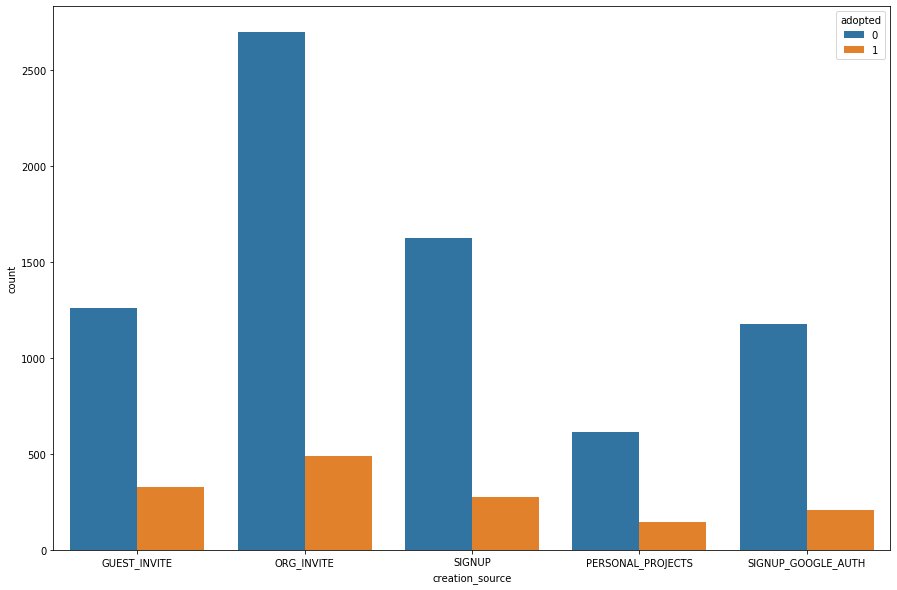

In [20]:
# graph adopted users by creation source
plt.rcParams['figure.figsize'] = (15, 10)
sns.countplot(x='creation_source', hue='adopted', data=df_users)

In [21]:
df_users.groupby('creation_source')['adopted'].mean().sort_values(ascending=False)

creation_source
GUEST_INVITE          0.205290
PERSONAL_PROJECTS     0.192408
ORG_INVITE            0.154015
SIGNUP_GOOGLE_AUTH    0.148736
SIGNUP                0.144889
Name: adopted, dtype: float64

Guest invited appears to be the most effective means of ensuring user adoption.

In [22]:
df_users.groupby('opted_in_to_mailing_list')['adopted'].mean()

opted_in_to_mailing_list
0    0.161740
1    0.169811
Name: adopted, dtype: float64

In [23]:
df_users.groupby('enabled_for_marketing_drip')['adopted'].mean()

enabled_for_marketing_drip
0    0.163192
1    0.167040
Name: adopted, dtype: float64

Rates of adoption are slighly higher for those in the mailing list or marketing drip.

In [24]:
# drop unimportant features
drop_cols = ['object_id', 'name', 'email', 'creation_time', 'last_session_creation_time', 'last_session_creation_datetime']
df_users = df_users.drop(drop_cols, axis=1)
df_users.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,GUEST_INVITE,1,0,11,10803.0,0
1,ORG_INVITE,0,0,1,316.0,1
2,ORG_INVITE,0,0,94,1525.0,0
3,GUEST_INVITE,0,0,1,5151.0,0
4,GUEST_INVITE,0,0,193,5240.0,0


In [25]:
# creation source needs to be one-hot encoded so model can use it
# use pd.get_dummies
df_dummies = pd.get_dummies(df_users, columns=['creation_source'], drop_first=True)
df_dummies.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,10803.0,0,0,0,0,0
1,0,0,1,316.0,1,1,0,0,0
2,0,0,94,1525.0,0,1,0,0,0
3,0,0,1,5151.0,0,0,0,0,0
4,0,0,193,5240.0,0,0,0,0,0


Even still, there are several steps we still need to take to preprocess this data. 
Because we have both numerical values with a wide range and binaries, some scaling would be good.
We also know that only about 16% of users are adopted, so we have a large class imbalance. Thankfully, train_test_split allows for stratified splitting.
We'll create a pipeline and use that to appropriately fit and transform the data.
Remember that the binary label of 'adopted' is the target variable.

In [26]:
# import necessary ML moldules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score # performance metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [27]:
# define target and features, then split
target = ['adopted']
features = [c for c in df_dummies.columns if c not in target]
X = df_dummies[features]
y = df_dummies[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)

In [28]:
# make pipelines for each model such that data is scaled and then fit
logreg = make_pipeline(StandardScaler(), LogisticRegression())
svc = make_pipeline(StandardScaler(), SVC())
dtc = make_pipeline(StandardScaler(), DecisionTreeClassifier())
rfc = make_pipeline(StandardScaler(), RandomForestClassifier())
gbc = make_pipeline(StandardScaler(), GradientBoostingClassifier())

In [29]:
# determine null accuracy - baseline accuracy for model, depending on class imbalance
print('Null accuracy: {}'.format(1 - y_test.mean()))

Null accuracy: adopted    0.836041
dtype: float64


Our models need to be at least this accurate; otherwise they are no better than a "dumb" model that predicts no adoption for every user.

In [30]:
# loop over models, fit data, then evaluate models

models = [logreg, svc, dtc, rfc, gbc]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(str(model))
    print('\n')
    print('Training accuracy: {:.3f}'.format(model.score(X_train, y_train)))
    print('Test accuracy: {:.3f}'.format(model.score(X_test, y_test)))
    print('F1 score: {:.3f}'.format(f1_score(y_test, y_pred)))
    print('ROC_AUC score: {:.3f}'.format(roc_auc_score(y_test, y_pred)))
    print('\n')
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print('Classification Report: ')
    print(classification_report(y_test, y_pred))

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)


Training accuracy: 0.836
Test accuracy: 0.836
F1 score: 0.000
ROC_AUC score: 0.500


Confusion Matrix: 
[[2213    0]
 [ 434    0]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2213
           1       0.00      0.00      0.00       

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)


Training accuracy: 0.836
Test accuracy: 0.836
F1 score: 0.000
ROC_AUC score: 0.500


Confusion Matrix: 
[[2213    0]
 [ 434    0]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2213
           1       0.00      0.00      0.00       434

    accuracy                           0.84      2647
   macro avg       0.42      0.50      0.46      2647
weighted avg       0.70      0.84      0.76   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_

None of these models surpassed null accuracy. Let's try again without Standard Scaler.
Combine models in dictionary instead this time; will make it easier to add to hyperparameter table.

In [31]:
models = {'Logistic Regression' : LogisticRegression(),
         'SVC' : SVC(),
         'Decision Tree' : DecisionTreeClassifier(),
         'Random Forest' : RandomForestClassifier(),
         'Gradient Boost' : GradientBoostingClassifier()}

# initialize empty lists to hold model scores
train_accs = []
test_accs = []
f1_scores = []
roc_auc_scores = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(name)
    print('\n')
    print('Training accuracy: {:.3f}'.format(train_acc))
    print('Test accuracy: {:.3f}'.format(test_acc))
    print('F1 score: {:.3f}'.format(f1))
    print('ROC_AUC score: {:.3f}'.format(roc_auc))
    print('\n')
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print('Classification Report: ')
    print(classification_report(y_test, y_pred))
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

Logistic Regression


Training accuracy: 0.836
Test accuracy: 0.836
F1 score: 0.000
ROC_AUC score: 0.500


Confusion Matrix: 
[[2213    0]
 [ 434    0]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2213
           1       0.00      0.00      0.00       434

    accuracy                           0.84      2647
   macro avg       0.42      0.50      0.46      2647
weighted avg       0.70      0.84      0.76      2647



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC


Training accuracy: 0.836
Test accuracy: 0.836
F1 score: 0.000
ROC_AUC score: 0.500


Confusion Matrix: 
[[2213    0]
 [ 434    0]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2213
           1       0.00      0.00      0.00       434

    accuracy                           0.84      2647
   macro avg       0.42      0.50      0.46      2647
weighted avg       0.70      0.84      0.76      2647

Decision Tree


Training accuracy: 0.938
Test accuracy: 0.756
F1 score: 0.193
ROC_AUC score: 0.523


Confusion Matrix: 
[[1924  289]
 [ 357   77]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      2213
           1       0.21      0.18      0.19       434

    accuracy                           0.76      2647
   macro avg       0.53      0.52      0.52      2647
weighted avg       0.74      0.76      0.75      2647



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest


Training accuracy: 0.938
Test accuracy: 0.771
F1 score: 0.132
ROC_AUC score: 0.504


Confusion Matrix: 
[[1996  217]
 [ 388   46]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2213
           1       0.17      0.11      0.13       434

    accuracy                           0.77      2647
   macro avg       0.51      0.50      0.50      2647
weighted avg       0.73      0.77      0.75      2647



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost


Training accuracy: 0.838
Test accuracy: 0.835
F1 score: 0.000
ROC_AUC score: 0.499


Confusion Matrix: 
[[2209    4]
 [ 434    0]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2213
           1       0.00      0.00      0.00       434

    accuracy                           0.83      2647
   macro avg       0.42      0.50      0.45      2647
weighted avg       0.70      0.83      0.76      2647



In [32]:
model_table = pd.DataFrame(models.keys(), columns=['name'])
model_table

,name
0,Logistic Regression
1,SVC
2,Decision Tree
3,Random Forest
4,Gradient Boost


In [33]:
# add lists of scores as columns
model_table['training_accuracy'] = train_accs
model_table['test_accuracy'] = test_accs
model_table['f1_score'] = f1_scores
model_table['roc_auc_score'] = roc_auc_scores
model_table

,name,training_accuracy,test_accuracy,f1_score,roc_auc_score
0,Logistic Regression,0.836302,0.836041,0.000000,0.500000
1,SVC,0.836302,0.836041,0.000000,0.500000
2,Decision Tree,0.937986,0.755950,0.192500,0.523414
3,Random Forest,0.937824,0.771439,0.131994,0.503967
4,Gradient Boost,0.838407,0.834530,0.000000,0.499096


Based on these metrics, the best model to use would be the decision tree classifier. Let's examine the feature importances in more detail.

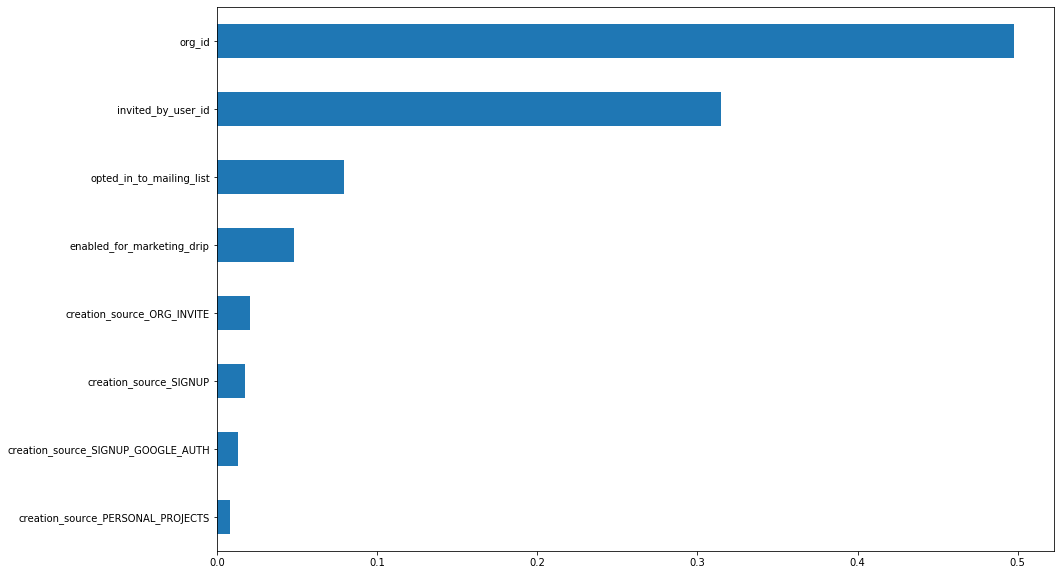

In [34]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind='barh')

In [35]:
feat_importances.sort_values(ascending=False)

org_id                                0.497685
invited_by_user_id                    0.315028
opted_in_to_mailing_list              0.079129
enabled_for_marketing_drip            0.048108
creation_source_ORG_INVITE            0.020897
creation_source_SIGNUP                0.017746
creation_source_SIGNUP_GOOGLE_AUTH    0.013405
creation_source_PERSONAL_PROJECTS     0.008003
dtype: float64

The feature which contributed most to the model was organization ID; clearly, being a part of an organization increases user engagement. 

In [36]:
df_users['org_id'].value_counts().head(10)

0     228
1     172
2     150
3     125
4     122
6     102
9      91
7      88
5      87
10     68
Name: org_id, dtype: int64

We don't actually have much information about these org ID's, but let's assume for a moment that ID 0 means no organization. How does the adoption rate compare between those in an org and those not?

In [37]:
no_org = df_users[df_users.org_id == 0]
in_org = df_users[df_users.org_id != 0]
print('No org: {}'.format(no_org['adopted'].mean()))
print('In org: {}'.format(in_org['adopted'].mean()))

No org: 0.04824561403508772
In org: 0.1668411867364747


Adoption rate indeed higher for those in orgs.
Let's look at invited users, those on the mailing list, and those in the marketing drip the same way

In [38]:
not_invited = df_users[df_users.invited_by_user_id == 0]
invited = df_users[df_users.invited_by_user_id != 0]
print('Not invited: {}'.format(not_invited['adopted'].mean()))
print('Invited: {}'.format(invited['adopted'].mean()))

Not invited: 0.15517667407956512
Invited: 0.17106365159128978


In [39]:
no_mail = df_users[df_users.opted_in_to_mailing_list == 0]
mail = df_users[df_users.opted_in_to_mailing_list == 1]
print('No mail: {}'.format(no_mail['adopted'].mean()))
print('Mail: {}'.format(mail['adopted'].mean()))

No mail: 0.1617401849325451
Mail: 0.16981132075471697


In [40]:
no_market = df_users[df_users.enabled_for_marketing_drip == 0]
market = df_users[df_users.enabled_for_marketing_drip == 1]
print('No marketing: {}'.format(no_market['adopted'].mean()))
print('Marketing: {}'.format(market['adopted'].mean()))

No marketing: 0.1631916599839615
Marketing: 0.16703952274422074


Compared to the difference between org members, the differences in adoption rate for these three categories are much smaller. 

In [41]:
invited_mail = invited[invited.opted_in_to_mailing_list == 1]
invited_mail_market = invited_mail[invited_mail.enabled_for_marketing_drip == 1]
invited_mail_market['adopted'].mean()

0.17446043165467626

Even among those who were invited, are part of the mailing list, and receive the marketing drip, the adoption rate is relatively small, although larger than any of these groups individually.

If I were to make any recommendations to Relax, I would say the most important thing is to increase organization membership. Whatever they can offer organizations to up their online presence, or users to join organizations, would probably be effective. Beyond that, inviting other users seems to have a significant impact on adoption rate. Relax should encourage users to invite their friends and colleagues, potentially by offering discounts or referral bonuses. 
Adding users to the mailing or marketing lists is also important, and are even more effective in combination. 